## Predict housing prices in Portland, Oregon.
#### Problem statement :
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
The file ex1data2.txt contains a training set of housing prices in Portland,Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house.
Dataset is like below :

| Size of the house (in square feet) | Number of bedrooms | Price of the house |
|------------------------------------|--------------------|--------------------|
| 2104                               | 3                  | 399900             |
| 1600                               | 3                  | 329900             |
| 2400                               | 3                  | 369000             |

Now we have to predict housing prices in Portland, Oregon.(including which is not mention in our example dataset).

**Note:This problem statement and dataset is from coursera Andrew ng machine learning [Coursework](https://www.coursera.org/learn/machine-learning)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#supressing the scientific output
np.set_printoptions(suppress=True) 

In [2]:
data = np.loadtxt("ex1data2.txt",dtype=np.float64,delimiter=",")
data[:5,::] #dataset loaded demonstration

array([[   2104.,       3.,  399900.],
       [   1600.,       3.,  329900.],
       [   2400.,       3.,  369000.],
       [   1416.,       2.,  232000.],
       [   3000.,       4.,  539900.]])

In [3]:
# Break datasets into X and Y.
X = data[::,0:2]
Y = data[::,-1:]

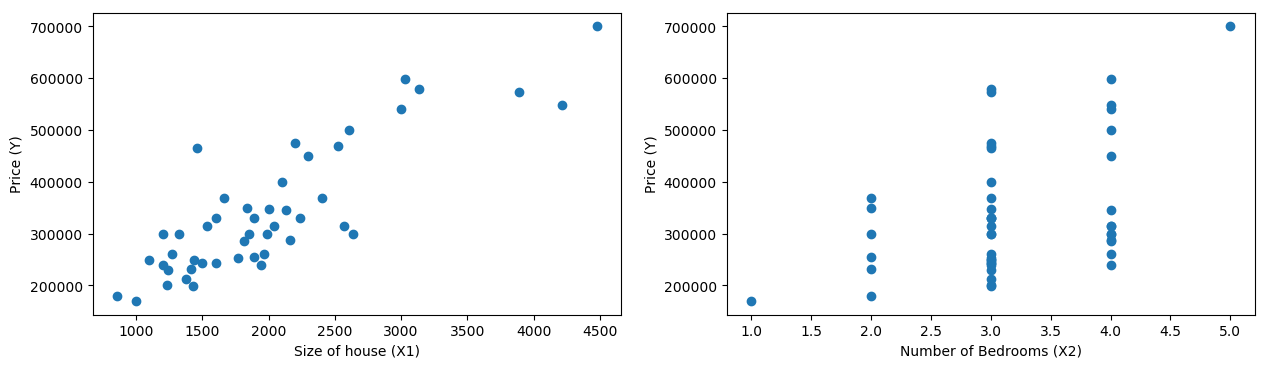

In [4]:
# Plotting example dataset
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X[::,0:1],Y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(X[::,-1:],Y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")
plt.show()


In [5]:
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,3)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
X_bias = np.ones((m,n+1))
X_bias[::,1:] = X
# output first 5 X_bias examples
print "X_bias = \n",X_bias[0:5,:]
print "Y = \n",Y[0:5,::]

X_bias = 
[[    1.  2104.     3.]
 [    1.  1600.     3.]
 [    1.  2400.     3.]
 [    1.  1416.     2.]
 [    1.  3000.     4.]]
Y = 
[[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]]


In [6]:
#feature scaling
# it also protect program from overflow error
mean_size = np.mean(X_bias[::,1:2])
mean_bedroom = np.mean(X_bias[::,2:])
size_std = np.std(X_bias[::,1:2])
bedroom_std = np.std(X_bias[::,2:])
X_bias[::,1:2] = (X_bias[::,1:2] - mean_size)/ (size_std) 
X_bias[::,2:] = (X_bias[::,2:] - mean_bedroom)/ (bedroom_std)
X_bias[0:5,::]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [7]:
#define function to find cost
def cost(X_bias,Y,Theta):
    np.seterr(over='raise')
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))

In [8]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,1:2])).sum(axis=0)
        temp2 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()
    return Theta

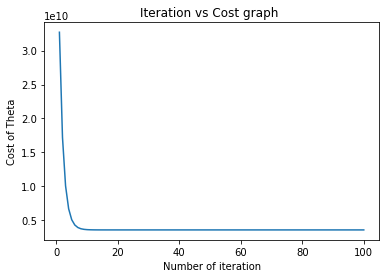

[[ 340412.65957447   72655.84621595   59125.40416724]]


In [9]:
alpha = 0.3
iterations = 100
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)
print Theta

In [10]:
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.0,1650.0,3]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (size_std) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (bedroom_std)
hypothesis = X_predict.dot(Theta.transpose())
print "Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis


Cost of house with 1650 sq ft and 3 bedroom is  [ 294637.10371537]
